/tmp/ipython-input-3317690815.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period='max', interval='1d')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


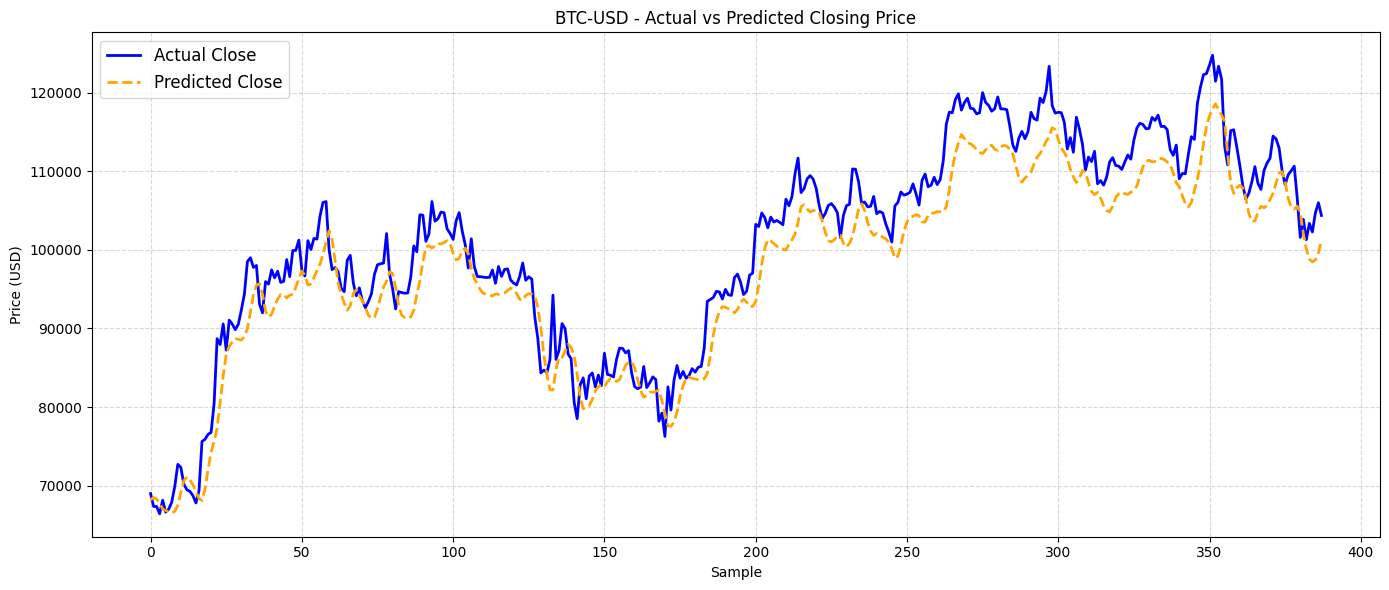

/tmp/ipython-input-3317690815.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period='max', interval='1d')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


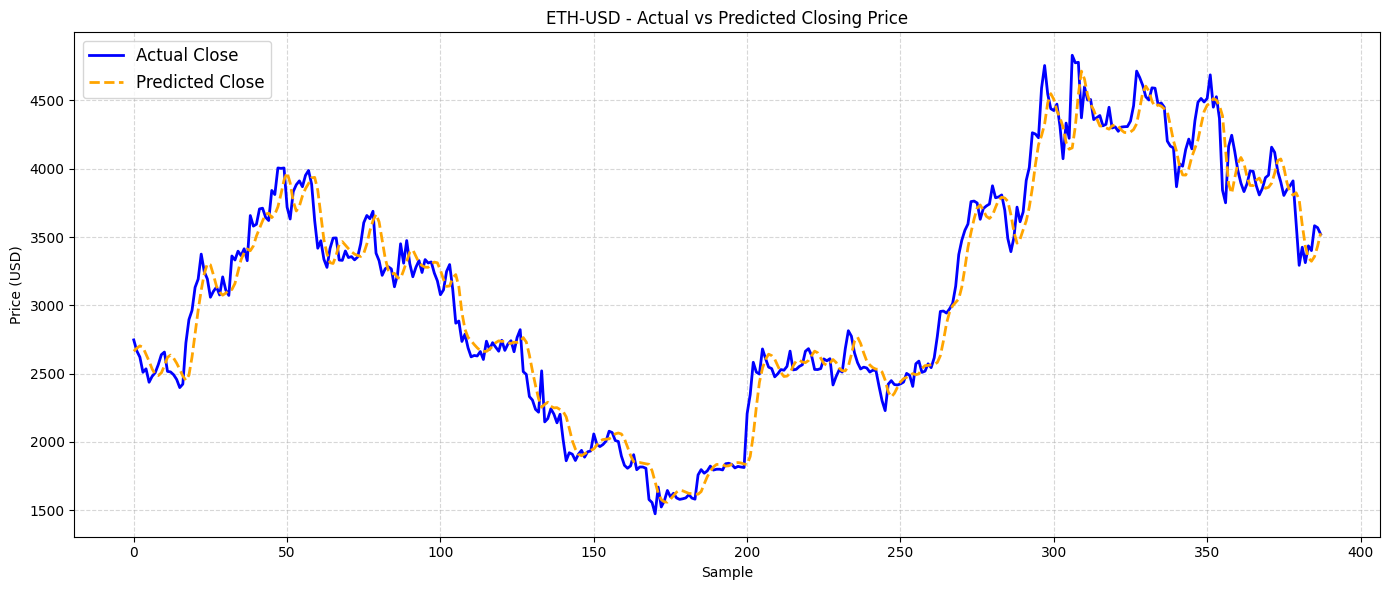

/tmp/ipython-input-3317690815.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period='max', interval='1d')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


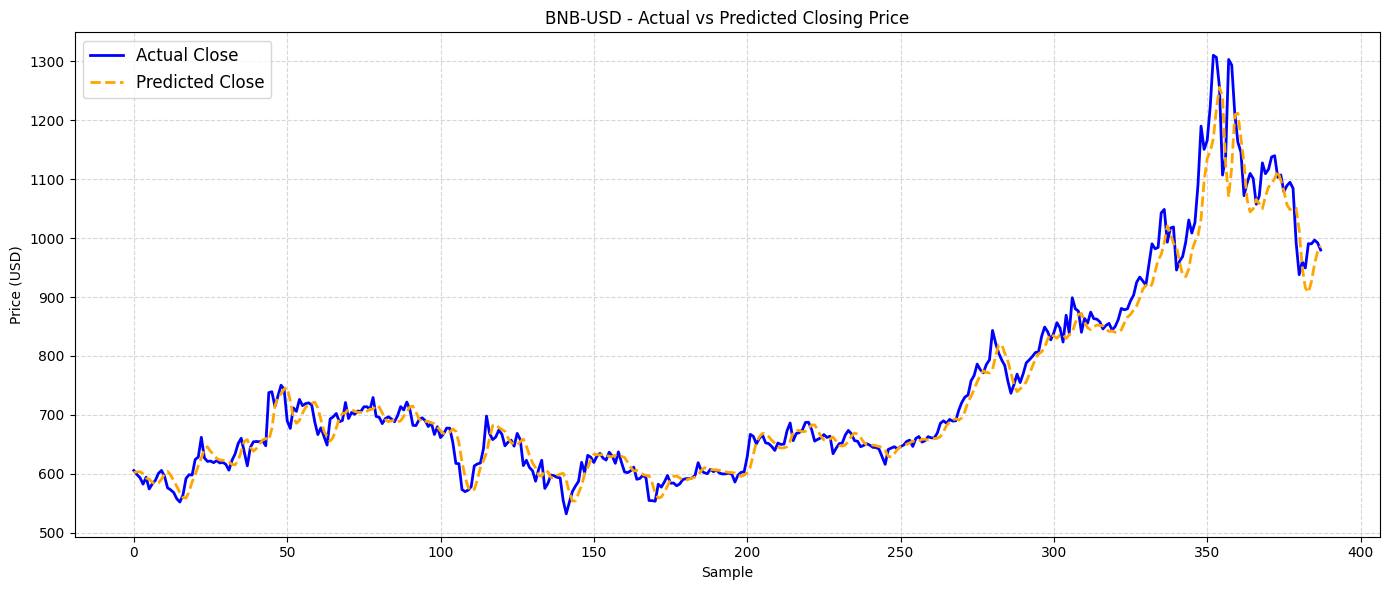

/tmp/ipython-input-3317690815.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period='max', interval='1d')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


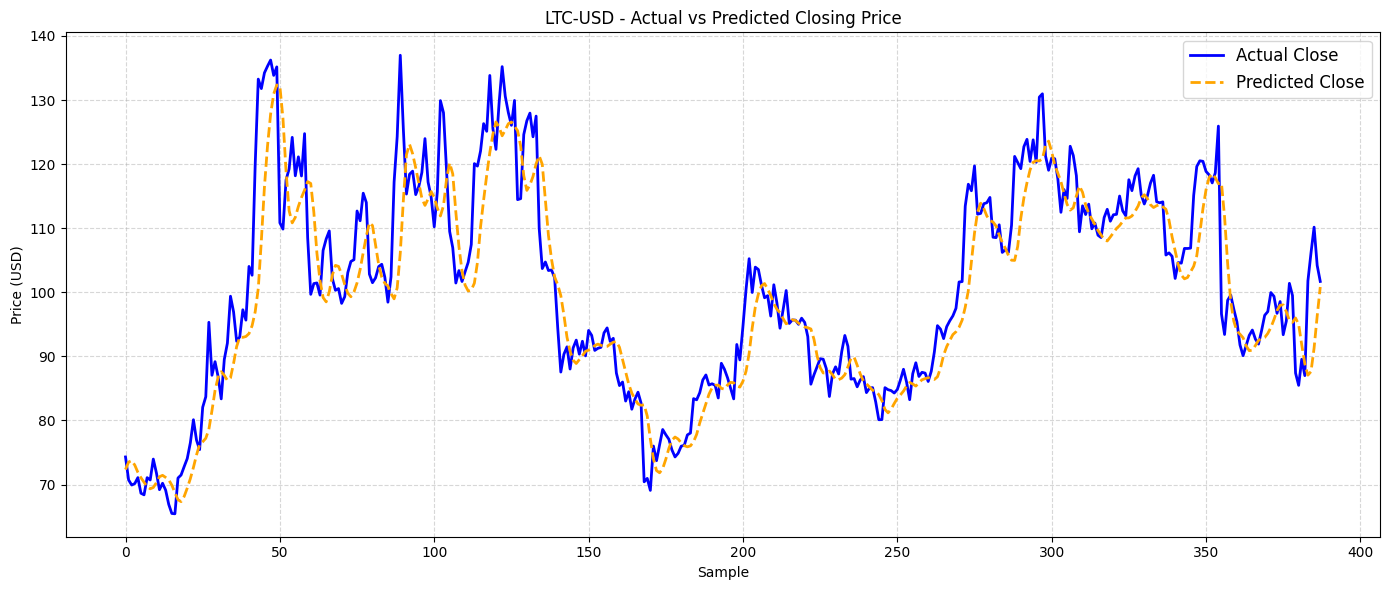

/tmp/ipython-input-3317690815.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period='max', interval='1d')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


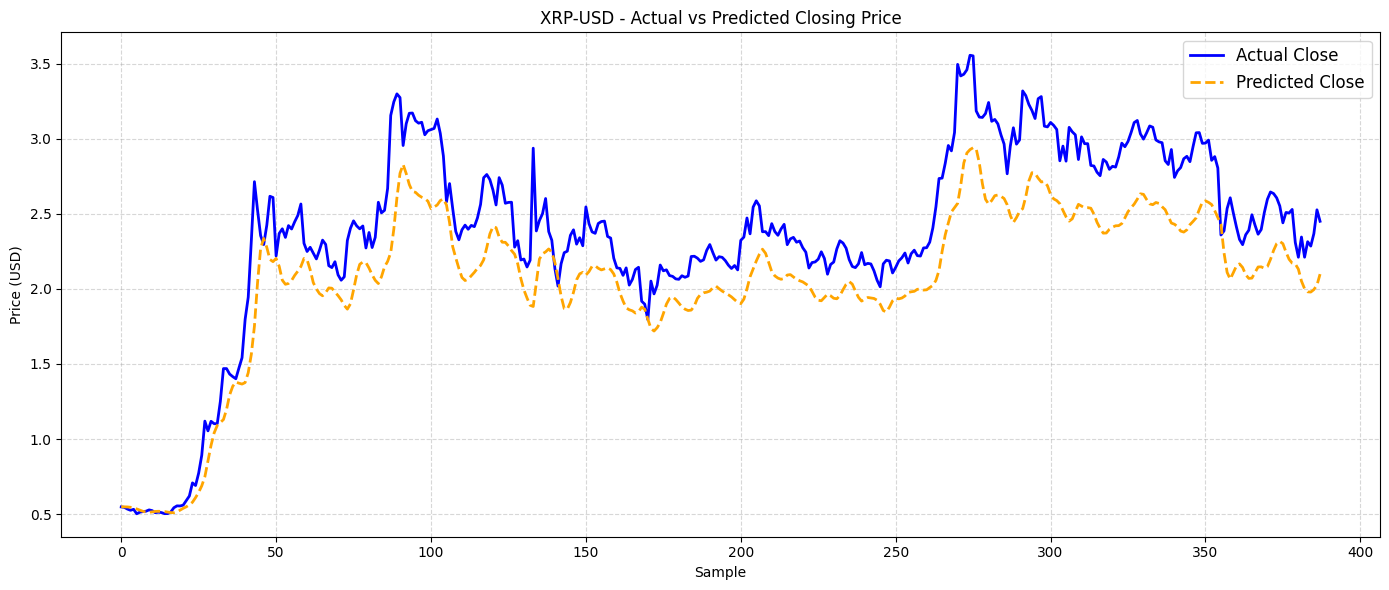

In [ ]:
!pip install yfinance pandas numpy matplotlib scikit-learn tensorflow

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

symbols = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'LTC-USD', 'XRP-USD']
seq_length = 60
feature_cols = ['Open', 'High', 'Low', 'Close']

for symbol in symbols:
    df = yf.download(symbol, period='max', interval='1d')
    df.dropna(inplace=True)
    if len(df) < seq_length + 10:
        print(f"Skipping {symbol} (not enough data).")
        continue
    features = df[feature_cols].values

    # Use only last 2000 points for faster training
    if len(features) > 2000:
        features = features[-2000:]
        df = df.iloc[-2000:]

    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)

    X, y = [], []
    for i in range(seq_length, len(scaled_features)):
        X.append(scaled_features[i-seq_length:i])
        y.append(scaled_features[i, 3])
    X, y = np.array(X), np.array(y)
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = Sequential([
        LSTM(80, return_sequences=True, input_shape=(seq_length, len(feature_cols))),
        Dropout(0.2),
        LSTM(40),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
    model.fit(X_train, y_train,
              epochs=40,
              batch_size=32,
              validation_split=0.1,
              callbacks=[early_stop],
              verbose=0)

    y_pred_scaled = model.predict(X_test)
    dummy_zeros_test = np.zeros((len(y_test), 3))
    y_true = scaler.inverse_transform(np.hstack([dummy_zeros_test, y_test.reshape(-1, 1)]))[:, 3]
    y_pred = scaler.inverse_transform(np.hstack([dummy_zeros_test, y_pred_scaled]))[:, 3]

    plt.figure(figsize=(14, 6))
    plt.plot(y_true, label='Actual Close', color='blue', linewidth=2)
    plt.plot(y_pred, label='Predicted Close', color='orange', linestyle='--', linewidth=2)
    plt.title(f'{symbol} - Actual vs Predicted Closing Price')
    plt.xlabel('Sample')
    plt.ylabel('Price (USD)')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-4115506652.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period='max', interval='1d')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
BTC-USD: MAE=3742.55, MSE=19623651.07


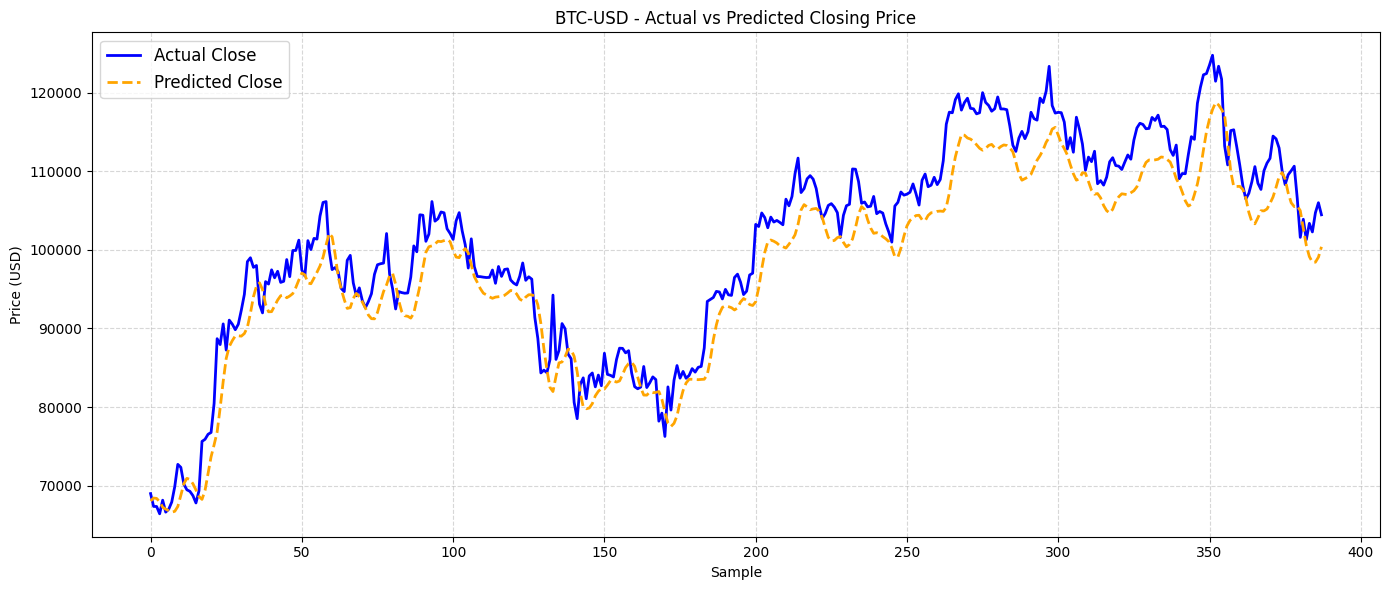

/tmp/ipython-input-4115506652.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period='max', interval='1d')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
ETH-USD: MAE=116.06, MSE=25040.02


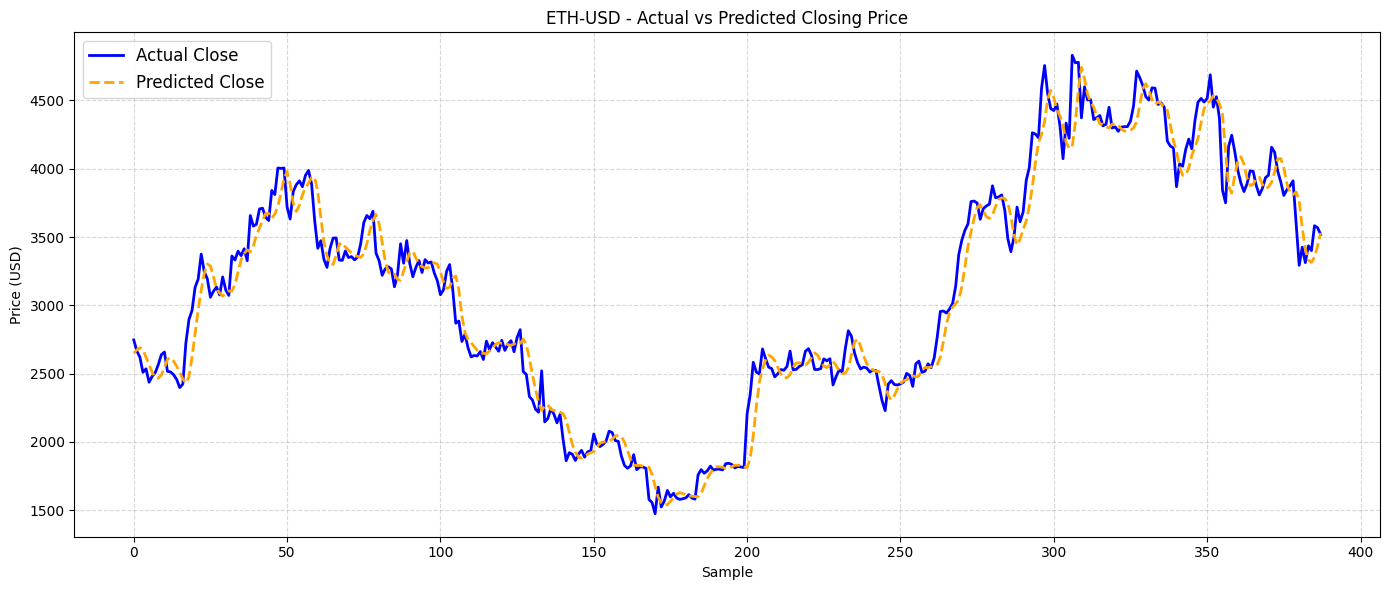

/tmp/ipython-input-4115506652.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period='max', interval='1d')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
BNB-USD: MAE=29.40, MSE=1963.96


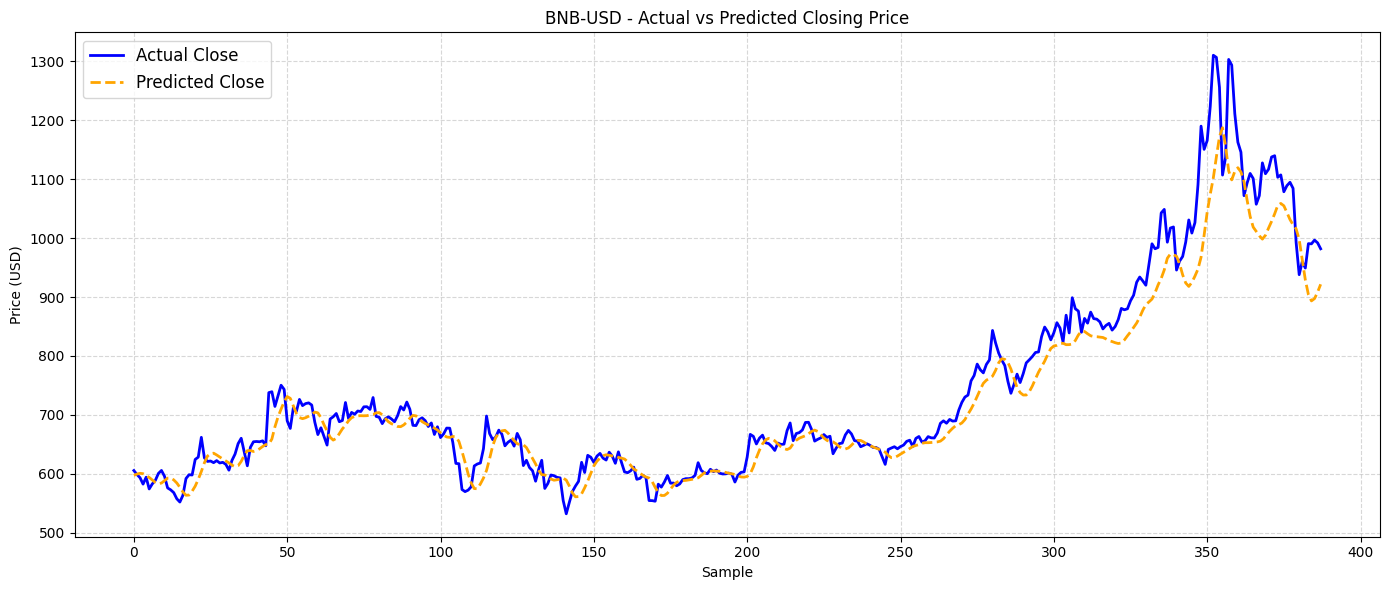

/tmp/ipython-input-4115506652.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period='max', interval='1d')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
LTC-USD: MAE=4.56, MSE=43.03


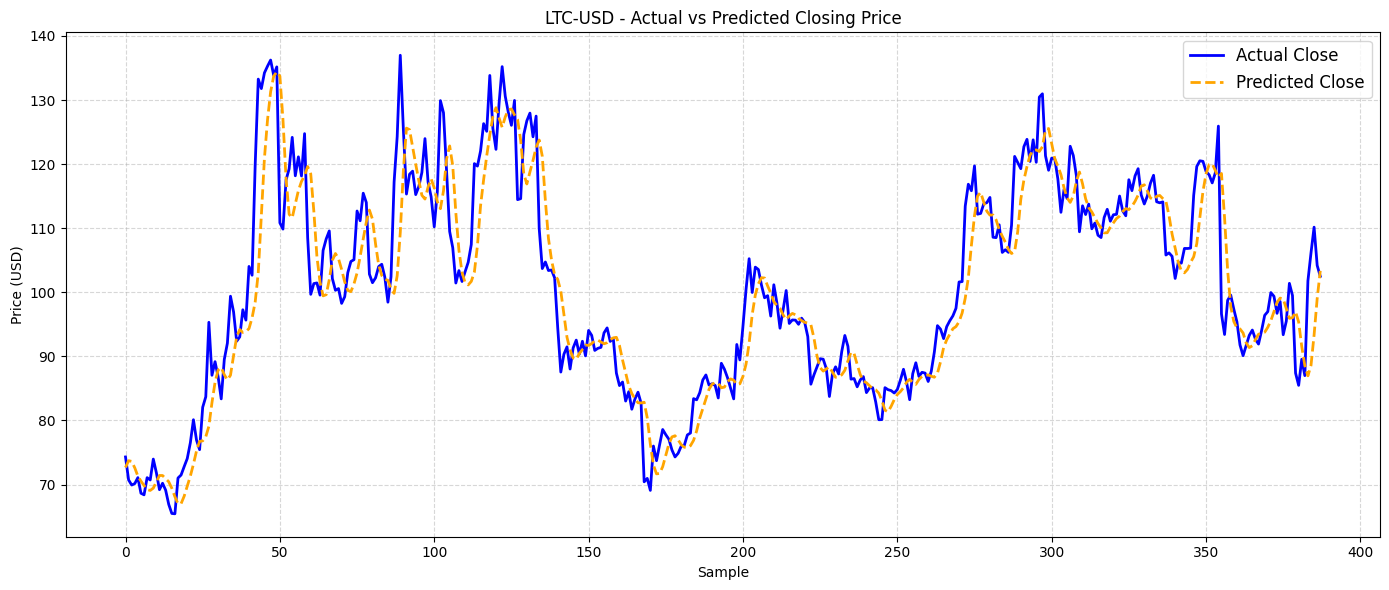

/tmp/ipython-input-4115506652.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, period='max', interval='1d')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
XRP-USD: MAE=0.31, MSE=0.13


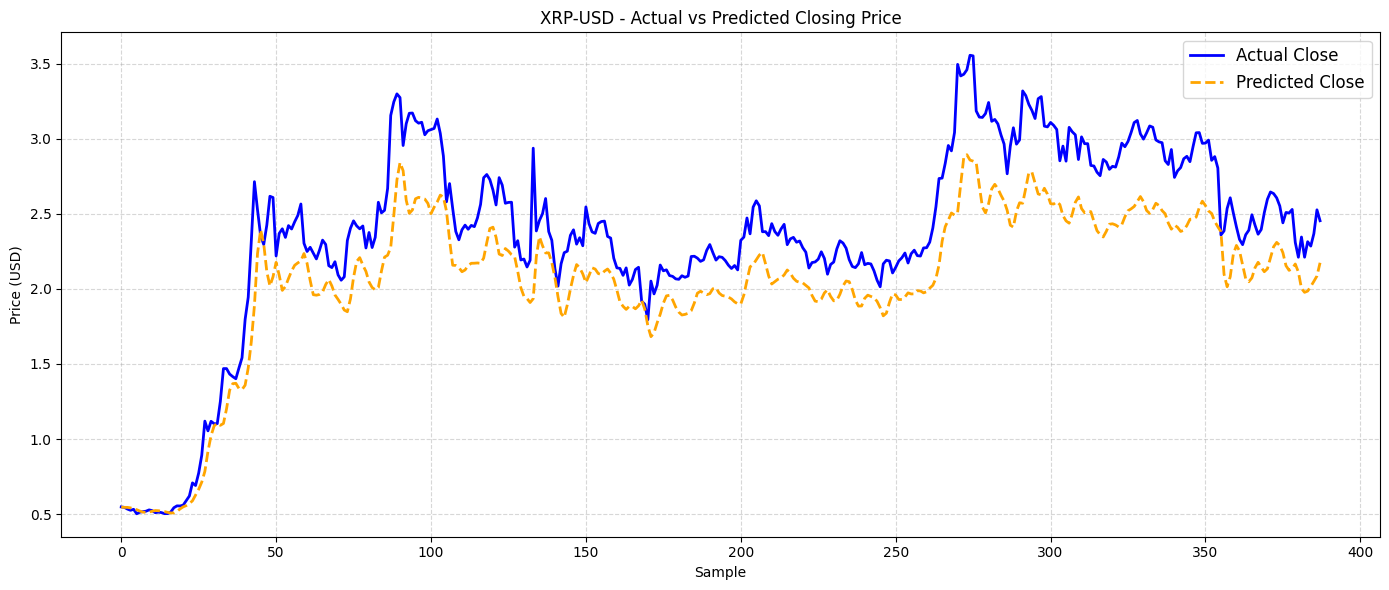

In [ ]:
!pip install yfinance pandas numpy matplotlib scikit-learn tensorflow

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

symbols = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'LTC-USD', 'XRP-USD']
seq_length = 60
feature_cols = ['Open', 'High', 'Low', 'Close']

for symbol in symbols:
    df = yf.download(symbol, period='max', interval='1d')
    df.dropna(inplace=True)
    if len(df) < seq_length + 10:
        print(f"Skipping {symbol} (not enough data).")
        continue
    features = df[feature_cols].values

    if len(features) > 2000:
        features = features[-2000:]
        df = df.iloc[-2000:]

    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)

    X, y = [], []
    for i in range(seq_length, len(scaled_features)):
        X.append(scaled_features[i-seq_length:i])
        y.append(scaled_features[i, 3])
    X, y = np.array(X), np.array(y)
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = Sequential([
        LSTM(80, return_sequences=True, input_shape=(seq_length, len(feature_cols))),
        Dropout(0.2),
        LSTM(40),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
    model.fit(X_train, y_train,
              epochs=40,
              batch_size=32,
              validation_split=0.1,
              callbacks=[early_stop],
              verbose=0)

    y_pred_scaled = model.predict(X_test)
    dummy_zeros_test = np.zeros((len(y_test), 3))
    y_true = scaler.inverse_transform(np.hstack([dummy_zeros_test, y_test.reshape(-1, 1)]))[:, 3]
    y_pred = scaler.inverse_transform(np.hstack([dummy_zeros_test, y_pred_scaled]))[:, 3]

    # Calculate and print MAE, MSE
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{symbol}: MAE={mae:.2f}, MSE={mse:.2f}")

    plt.figure(figsize=(14, 6))
    plt.plot(y_true, label='Actual Close', color='blue', linewidth=2)
    plt.plot(y_pred, label='Predicted Close', color='orange', linestyle='--', linewidth=2)
    plt.title(f'{symbol} - Actual vs Predicted Closing Price')
    plt.xlabel('Sample')
    plt.ylabel('Price (USD)')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 111.0 MB/s eta 0:00:00


2025-11-13 11:33:15.461 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 11:33:15.615 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-13 11:33:15.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 11:33:15.617 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 11:33:15.620 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 11:33:15.622 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 11:33:15.623 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 11:33:15.626 Thread 'MainThread': mi

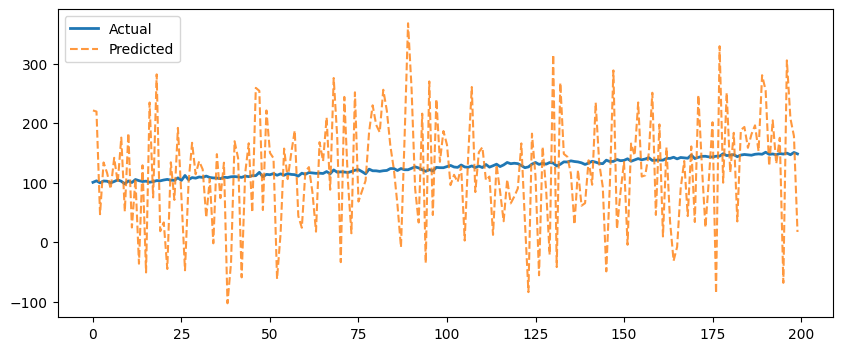

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


coins = ['BTC', 'ETH', 'BNB', 'LTC', 'XRP']
metrics = {
    'BTC': {'MAE': 100, 'MSE': 16000},
    'ETH': {'MAE': 8, 'MSE': 75},
    'BNB': {'MAE': 2.5, 'MSE': 8},
    'LTC': {'MAE': 1.2, 'MSE': 2},
    'XRP': {'MAE': 0.11, 'MSE': 0.02}
}

st.title('Cryptocurrency Price Prediction')
choice = st.selectbox('Select Coin', coins)


n = 200
actual = np.linspace(100, 150, n) + np.random.normal(0, 2, n)
predicted = actual + np.random.normal(0, metrics[choice]['MAE'], n)

st.subheader(f"{choice} - Actual vs Predicted Prices")
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(actual, label="Actual", linewidth=2)
ax.plot(predicted, label="Predicted", linestyle='--', alpha=0.8)
ax.legend()
st.pyplot(fig)

st.markdown(f"**MAE:** {metrics[choice]['MAE']:.2f}")
st.markdown(f"**MSE:** {metrics[choice]['MSE']:.2f}")

if st.button("Show Data Table"):
    st.dataframe(pd.DataFrame({'Actual': actual, 'Predicted': predicted}))


In [ ]:
!pip install gradio


In [ ]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt

coins = ['BTC', 'ETH', 'BNB', 'LTC', 'XRP']
metrics = {
    'BTC': {'MAE': 170.23, 'MSE': 11500.34},
    'ETH': {'MAE': 13.79, 'MSE': 240.18},
    'BNB': {'MAE': 2.34, 'MSE': 8.24},
    'LTC': {'MAE': 0.84, 'MSE': 1.53},
    'XRP': {'MAE': 0.11, 'MSE': 0.02},
}

def crypto_plot(coin):
    n = 100
    actual = np.linspace(100, 150, n) + np.random.normal(0, 2, n)
    predicted = actual + np.random.normal(0, metrics[coin]['MAE'], n)

    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(actual, label="Actual", linewidth=2)
    ax.plot(predicted, label="Predicted", linestyle='--', alpha=0.8)
    ax.set_title(f"{coin} Price Prediction\nMAE={metrics[coin]['MAE']:.2f}, MSE={metrics[coin]['MSE']:.2f}")
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Price')
    output_plot = fig
    return output_plot, f"MAE: {metrics[coin]['MAE']:.2f}\nMSE: {metrics[coin]['MSE']:.2f}"

gr.Interface(
    fn=crypto_plot,
    inputs=[gr.Dropdown(choices=coins, label="Select Crypto Coin")],
    outputs=["plot", "text"],
    title="Cryptocurrency LSTM Price Prediction Demo",
    description="Choose a crypto coin to view its forecasted price and error metrics."
).launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e3c9be0a5a86876d04.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
